In [ ]:
import gym

In [ ]:
!pip install gym pyvirtualdisplay
!apt-get install -y xvfb python-opengl ffmpeg

!apt-get update
!apt-get install cmake
!pip install --upgrade setuptools
!pip install ez_setup
!pip install gym[atari]

!pip install box2d-py
!pip install gym[Box_2D]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl xvfb
0 upgraded, 2 newly installed, 0 to remove and 45 not upgraded.
Need to get 1,280 kB of archives.
After this operation, 7,687 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.10 [784 kB]
Fetched 1,280 kB in 1s (1,687 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 155632 files and direc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ez-setup: filename=ez_setup-0.9-py3-none-any.whl size=10998 sha256=e5f9d7bca17d2bed2571612c10b0401d3a0e67eae4b87f2217d9754f19e0e8e3
  Stored in directory: /root/.cache/pip/wheels/f4/78/bd/f88c8eddfd5a8bf2a029e5cd8bc7a9914597002b081a000ffe
Successfully built ez-setup
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 448 kB 15.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
env = gym.make('MountainCar-v0')
print(env.observation_space)
print(env._max_episode_steps)

Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)
200


In [ ]:
print(env.action_space)

Discrete(3)


In [ ]:
env.reset()

array([-0.53127337,  0.        ])

In [ ]:
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else: 
        print("Could not find video")

def wrap_env(env):
    env = Monitor(env, './video', force=True)
    return env

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [ ]:
step = 0
score = 0
while True:
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)
  score += reward
  step += 1
  if done:
    break

In [ ]:
env.close()
show_video()

In [ ]:
import tensorflow as tf  
import gym  
import random  
import numpy as np

env = gym.make('MountainCar-v0')

In [ ]:
scores = []
training_data = []
accepted_scores = []
required_score = -198
episodes = 20000

for i in range(episodes):
  env.reset()
  score = 0
  game_memory = []
  previous_obs = []

  while True:
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    if len(previous_obs) > 0:
      game_memory.append([previous_obs, action])
    previous_obs = obs
    if obs[0] > -0.2:
      reward = 1
    score += reward
    if done:
      break

  scores.append(score)
  if score > required_score:
    accepted_scores.append(score)
    for data in game_memory:
      training_data.append(data)

In [ ]:
print('training done')
print('mean of scores', np.mean(scores))
print('number of accepted scores', len(accepted_scores))
print('mean of accepted scores', np.mean(accepted_scores))

training done
mean of scores -199.9193
number of accepted scores 91
mean of accepted scores -182.32967032967034


In [ ]:
X_train = np.array([i[0] for i in training_data]).reshape(-1, 2)
Y_train = np.array([i[1] for i in training_data]).reshape(-1, 1)

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(32, input_shape=(2,), activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax'),
])
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
566/566 [==============================] - 1s 1ms/step - loss: 1.0976 - accuracy: 0.3484
Epoch 2/10
566/566 [==============================] - 1s 1ms/step - loss: 1.0961 - accuracy: 0.3662
Epoch 3/10
566/566 [==============================] - 1s 1ms/step - loss: 1.0942 - accuracy: 0.3780
Epoch 4/10
566/566 [==============================] - 1s 1ms/step - loss: 1.0922 - accuracy: 0.3806
Epoch 5/10
566/566 [==============================] - 1s 1ms/step - loss: 1.0903 - accuracy: 0.3917
Epoch 6/10
566/566 [==============================] - 1s 1ms/step - loss: 1.0894 - accuracy: 0.3911
Epoch 7/10
566/566 [==============================] - 1s 1ms/step - loss: 1.0885 - accuracy: 0.3962
Epoch 8/10
566/566 [==============================] - 1s 1ms/step - loss: 1.0878 - accuracy: 0.3914
Epoch 9/10
566/566 [==============================] - 1s 1ms/step - loss: 1.0874 - accuracy: 0.3965
Epoch 10/10
566/566 [==============================] - 1s 1ms/step - loss: 1.0873 - accuracy: 0.3941

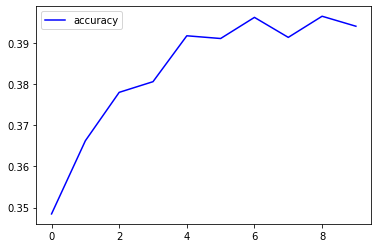

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.legend()
plt.show()

In [ ]:
env.close()
env = wrap_env(gym.make('MountainCar-v0'))
env.reset()

score = 0
step = 0
previous_obs = []
while True:
  if len(previous_obs) is 0:
    action = env.action_space.sample()
  else:
    logit = model.predict(np.expand_dims(previous_obs, axis=0))[0]
    action = np.argmax(logit)
  obs, reward, done, _ = env.step(action)
  previous_obs = obs
  score += reward
  step += 1

  if done:
    break

print('score: ', score)
print('step: ', step)
env.close()
show_video()

score:  -92.0
step:  92
